In [ ]:
## Question 1 Part a

### Read in dataset and only use 'X' as df

In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import math as math
x = loadmat('0_1_2.mat')

In [3]:
df = x['X']
df.shape

(64, 300)

In [4]:
df_o = df = x['X']
df = df - df.mean(axis =1)[:, np.newaxis]
s = df.dot(df.T)

In [5]:
s.shape

(64, 64)

In [6]:
w, v = np.linalg.eig(s)
# evector = np.linalg.eigh(s)

In [7]:
u1 = v[:, 0]
u2 = v[:, 1]

In [8]:
u1 = np.array([u1])
u2 = np.array([u2])

In [715]:
### The shape of matrix U is 64 by 2

In [9]:
U = np.concatenate((u1,u2), axis = 0).T
U.shape

(64, 2)

In [11]:
Y = (U.T).dot(df)
Y.shape

(2, 300)

In [501]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import numpy as np
from numpy.linalg import norm

def plotimages(images, Y, scale=0.9, proportion=0.2, mu01 = mu01,mu11=mu11,mu21=mu21,mu02 = mu02,mu12 = mu12,mu22=mu22 ):
    '''
    Input:
        images: images, must be in a 3-dimensional matrix (x by y by n)
            e.g. if X is 64 by 400 and size of each image is 8 by 8, images=np.reshape(X,(8,8,400));
        Y: coordinates of where to plot the image (Y(1,:) by Y(2,:)
        scale: scale of each image wrt to figure size (scale <= 1, e.g. 0.8)
        proportion: proportion of the data to be ploted (proportion <= 1)
            e.g. if there are 400 data points proportion = 1, plots
            all 400 data points and proportion = 0.5 plot only 200 data points 
            (i.e. 1th, 3th, 5th, ...)
    Ali Ghodsi 2006
    '''
    # Y /= norm(Y, axis = 1, ord=2).reshape((Y.shape[0],1))
    inc = np.floor(1/proportion)
    
    image_width = images.shape[0]
    image_height = images.shape[1] 
    n_images = images.shape[2]
    
    plt.gray()
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.set_xlim((Y[0,:].min()*1.2,Y[0,:].max()*1.2))
    ax.set_ylim((Y[1,:].min()*1.2,Y[1,:].max()*1.2))
    
    for counter in np.arange(0,n_images,inc):
        counter = int(counter)
        xy = (Y[0,counter],Y[1,counter])
        current_image = 1-np.reshape(images[:,:,counter], (image_width,image_height))
        imagebox = OffsetImage(current_image, zoom=scale)
        ab = AnnotationBbox(imagebox, xy, xybox=(1., -1.), xycoords='data', boxcoords="offset points", frameon=False)                                  
        ax.add_artist(ab)
        plt.draw()
    plt.scatter([mu01,mu11,mu21],[mu02,mu12,mu22])
    plt.show()

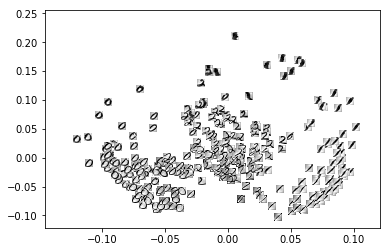

In [424]:
plotimages(np.reshape(df,(8,8,300)), -Y, scale=0.9, proportion=1)

In [ ]:
### Q1 Part b

In [ ]:
mu0 = np.mean(df[:, 0:100], axis=1)
mu1 = np.mean(df[:, 100:200], axis=1)
mu2 = np.mean(df[:, 200:300], axis=1)
mu2.shape

In [ ]:
s0 = np.cov(df_o[:,0:100])
s1 = np.cov(df_o[:,100:200])
s2 = np.cov(df_o[:,200:300])
s2.shape

In [ ]:
S_w = s0+s1+s2
S_w.shape

In [ ]:
mu_t = (mu0+mu1+mu2)/3
mu_t = mu_t.reshape((64,1))
(df-mu_t).shape

In [ ]:
S_t = (1/300)*(df - mu_t).dot((df - mu_t).T)
S_t.shape

S_b = S_t - S_w
S_b.shape

In [ ]:
w, v = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
v.shape  

In [ ]:
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

u1 = v[:, 0]
u2 = v[:, 1]

u1 = np.array([u1])
u2 = np.array([u2])

U = np.concatenate((u1,u2), axis = 0).T

Y1 = (U.T).dot(df_o)
Y1.shape

C:\Users\hyq92\Anaconda3\lib\site-packages\matplotlib\transforms.py:989: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval
C:\Users\hyq92\Anaconda3\lib\site-packages\matplotlib\transforms.py:994: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
C:\Users\hyq92\Anaconda3\lib\site-packages\matplotlib\text.py:1770: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
C:\Users\hyq92\Anaconda3\lib\site-packages\matplotlib\text.py:1772: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


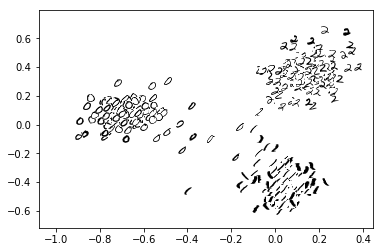

In [192]:
plotimages(np.reshape(df_o,(8,8,300)), Y1, scale=0.9, proportion=1)

In [ ]:
## Question 1 Part c

In [15]:
Yt = Y.T
#Yt[:,1] *= -1

Yt.shape


(300, 2)

In [38]:
mu0 = np.mean(Yt[0:100,:],axis = 0)
mu1 = np.mean(Yt[100:200,:],axis = 0)
mu2 = np.mean(Yt[200:300,:],axis = 0)

# those mu are the right cordinates on pdf's plot, but not on prof's demo plot

array([ 1.30905464,  0.26209481])

In [59]:
# cov matrix for class 1,2 & 3: used in QDA
covmat0 = (1/100)*(Yt[0:100,:]-mu0).T.dot(Yt[0:100,:]-mu0)
covmat1 = (1/100)*(Yt[100:200,:]-mu1).T.dot(Yt[100:200,:]-mu1)
covmat2 = (1/100)*(Yt[200:300,:]-mu2).T.dot(Yt[200:300,:]-mu2)
covmat0

array([[ 0.3582071 , -0.03072764],
       [-0.03072764,  0.44916157]])

In [18]:
# cov matrix for LDA: ave of cov matrix of 1,2 & 3
covmat_lda = (covmat0 + covmat1 + covmat2)/3
covmat_lda

array([[  1.45521365e+02,   1.25085127e-13],
       [  1.25085127e-13,   7.32452006e+01]])

In [ ]:
## Question 1 Part d

In [ ]:
### LDA decision boundaries

In [20]:
x_new = np.array(np.arange(-2, 2, 0.004))
x_new.shape

(1000,)

In [22]:
b01 = ((-1) * mu1.dot(np.linalg.inv(covmat_lda)).dot(mu1.T)) + (mu0.dot(np.linalg.inv(covmat_lda)).dot(mu0.T))
a01 = (2 * mu1.dot(np.linalg.inv(covmat_lda))) - (2 * mu0.dot(np.linalg.inv(covmat_lda)))
a01


array([-0.03599805, -0.00736477])

In [23]:
b02 = ((-1) * mu2.dot(np.linalg.inv(covmat_lda)).dot(mu2.T)) + (mu0.dot(np.linalg.inv(covmat_lda)).dot(mu0.T))
b02 = (2 * mu2.dot(np.linalg.inv(covmat_lda))) - (2 * mu0.dot(np.linalg.inv(covmat_lda)))
b02

0.011829503784023272

In [24]:
b12 = ((-1) * mu1.dot(np.linalg.inv(covmat_lda)).dot(mu1.T)) + (mu2.dot(np.linalg.inv(covmat_lda)).dot(mu2.T))
a12 = (2 * mu1.dot(np.linalg.inv(covmat_lda))) - (2 * mu2.dot(np.linalg.inv(covmat_lda)))
a12.shape

(2,)

In [853]:
### this is the analytical form of LDA decision boundaries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import numpy as np
from numpy.linalg import norm

def plotimages(images, Y, scale=0.9, proportion=0.2):
    '''
    Input:
        images: images, must be in a 3-dimensional matrix (x by y by n)
            e.g. if X is 64 by 400 and size of each image is 8 by 8, images=np.reshape(X,(8,8,400));
        Y: coordinates of where to plot the image (Y(1,:) by Y(2,:)
        scale: scale of each image wrt to figure size (scale <= 1, e.g. 0.8)
        proportion: proportion of the data to be ploted (proportion <= 1)
            e.g. if there are 400 data points proportion = 1, plots
            all 400 data points and proportion = 0.5 plot only 200 data points 
            (i.e. 1th, 3th, 5th, ...)
    Ali Ghodsi 2006
    '''
    # Y /= norm(Y, axis = 1, ord=2).reshape((Y.shape[0],1))
    inc = np.floor(1/proportion)
    
    image_width = images.shape[0]
    image_height = images.shape[1] 
    n_images = images.shape[2]
    
    plt.gray()
    fig = plt.gcf()
    fig.clf()
    ax = plt.subplot(111)
    ax.set_xlim((Y[0,:].min()*1.2,Y[0,:].max()*1.2))
    ax.set_ylim((Y[1,:].min()*1.2,Y[1,:].max()*1.2))
    
    for counter in np.arange(0,n_images,inc):
        counter = int(counter)
        xy = (Y[0,counter],Y[1,counter])
        current_image = 1-np.reshape(images[:,:,counter], (image_width,image_height))
        imagebox = OffsetImage(current_image, zoom=scale)
        ab = AnnotationBbox(imagebox, xy, xybox=(1., -1.), xycoords='data', boxcoords="offset points", frameon=False)                                  
        ax.add_artist(ab)
        plt.draw()
    #plt.show()

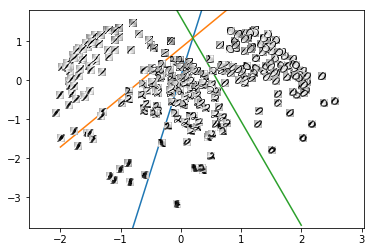

In [844]:
plotimages(np.reshape(df,(8,8,300)), Y, scale=0.9, proportion=1)
plt.plot(x_new, ((a01[0] * x_new - b01).T)/A01[1])
plt.plot(x_new, ((a02[0] * x_new - b02).T)/A02[1])
plt.plot(x_new, ((a12[0] * x_new - b12).T)/A12[1])
# plt.scatter([mu01,mu11,mu21],[mu02,mu12,mu22])
plt.show()

In [ ]:
### QDA decision boundaries

In [ ]:
x_new = np.array(np.arange(-2, 2, 0.004))
x_new.shape

In [67]:
A01 = np.linalg.inv(covmat0) - np.linalg.inv(covmat1)
A02 = np.linalg.inv(covmat0) - np.linalg.inv(covmat2)
A12 = np.linalg.inv(covmat1) - np.linalg.inv(covmat2)

(2, 2)

In [98]:
B01 = (-2)*(mu0.T.dot(np.linalg.inv(covmat0)) - mu1.T.dot(np.linalg.inv(covmat1)))
B02 = (-2)*(mu0.T.dot(np.linalg.inv(covmat0)) - mu2.T.dot(np.linalg.inv(covmat2)))
B12 = (-2)*(mu1.T.dot(np.linalg.inv(covmat1)) - mu2.T.dot(np.linalg.inv(covmat2)))

array([-15.12729862,  -3.38916547])

In [62]:
C01 = (-1/2)*(mu0.T.dot(np.linalg.inv(covmat0)).dot(mu0) - mu1.T.dot(np.linalg.inv(covmat1)).dot(mu1) )\
- (1/2)*(np.log(np.linalg.det(covmat0)) - np.log(np.linalg.det(covmat1)) )

C02 = (-1/2)*(mu0.T.dot(np.linalg.inv(covmat0)).dot(mu0) - mu2.T.dot(np.linalg.inv(covmat2)).dot(mu2) )\
- (1/2)*(np.log(np.linalg.det(covmat0)) - np.log(np.linalg.det(covmat1)) )

C12 = (-1/2)*(mu1.T.dot(np.linalg.inv(covmat1)).dot(mu1) - mu2.T.dot(np.linalg.inv(covmat2)).dot(mu2) )\
- (1/2)*(np.log(np.linalg.det(covmat1)) - np.log(np.linalg.det(covmat2)) )

-3.452015945631282

In [85]:

def db01(x_new):
    a1 = A01[1,1]
    b1 = A01[1,0]*x_new + A01[0,1]*x_new +B01[1]
    c1 = A01[0,0]*(x_new**2) + B01[0]*x_new +C01

    return (-b1 + np.sqrt(b1**2 - 4*a1*c1))/(2*a1)

def db01_n(x_new):
    a1 = A01[1,1]
    b1 = A01[1,0]*x_new + A01[0,1]*x_new +B01[1]
    c1 = A01[0,0]*(x_new**2) + B01[0]*x_new +C01

    return (-b1 - np.sqrt(b1**2 - 4*a1*c1))/(2*a1)


In [86]:

def db02(x_new):
    a2 = A02[1,1]
    b2 = A02[1,0]*x_new + A02[0,1]*x_new +B02[1]
    c2 = A02[0,0]*(x_new**2) + B02[0]*x_new +C02

    return (-b2 + np.sqrt(b2**2 - 4*a2*c2))/(2*a2)

def db02_n(x_new):
    a2 = A02[1,1]
    b2 = A02[1,0]*x_new + A02[0,1]*x_new +B02[1]
    c2 = A02[0,0]*(x_new**2) + B02[0]*x_new +C02

    return (-b2 - np.sqrt(b2**2 - 4*a2*c2))/(2*a2)


In [92]:

def db12(x_new):
    a3 = A12[1,1]
    b3 = (A12[1,0])*x_new + (A12[0,1])*x_new +B12[1]
    c3 = (A12[0,0])*(x_new**2) + (B12[0])*x_new +C12

    return (-b3 + np.sqrt((b3)**2 - 4*a3*c3))/(2*a3)

def db12_n(x_new):
    a3 = A12[1,1]
    b3 = (A12[1,0])*x_new + (A12[0,1])*x_new +B12[1]
    c3 = (A12[0,0])*(x_new**2) + (B12[0])*x_new +C12

    return (-b3 - np.sqrt((b3)**2 - 4*a3*c3))/(2*a3)


C:\Users\hyq92\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
C:\Users\hyq92\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


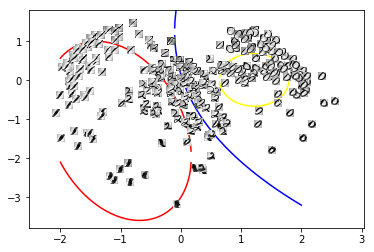

In [185]:
# plotimages(np.reshape(df,(8,8,300)), Y, scale=0.9, proportion=0.2)
plt.axis([-2,3,-3,3])
# plt.scatter(Yt[0:100,0], Yt[0:100,1])
# plt.scatter(Yt[100:200,0], Yt[100:200,1])
# plt.scatter(Yt[200:300,0], Yt[200:300,1])

plotimages(np.reshape(df,(8,8,300)), Y, scale=0.9, proportion=1)
plt.plot(x_new, db01(x_new), color = 'blue')
plt.plot(x_new, db01_n(x_new), color = 'blue')

plt.plot(x_new, db02(x_new), color = 'red')
plt.plot(x_new, db02_n(x_new), color = 'red')

plt.plot(x_new, db12(x_new), color = 'yellow')
plt.plot(x_new, db12_n(x_new), color = 'yellow')
plt.show()

In [ ]:
## Question 1 Part e

In [ ]:
### calculate mu0, mu1 & mu2: 64 by 1 vectors 

In [145]:
mu0 = np.mean(df[:, 0:100], axis=1)
mu1 = np.mean(df[:, 100:200], axis=1)
mu2 = np.mean(df[:, 200:300], axis=1)
mu2.shape

(64,)

In [ ]:
### calculate var-cov matrix: average of cov matrice of class 0,1 & 2

In [187]:
s0 = df[:,0:100].dot(df[:,0:100].T)
s1 = df[:,100:200].dot(df[:,100:200].T)
s2 = df[:,200:300].dot(df[:,200:300].T)

s_lda = (s0+s1+s2)/3
s_lda.shape

(64, 64)

In [189]:
Pr0 = ((df.T @ np.linalg.inv(s_lda) @ mu0) - (0.5)*(mu0.T @ np.linalg.inv(s_lda) @ mu0) + math.log(1/3)).reshape(1,300)
Pr1 = ((df.T @ np.linalg.inv(s_lda) @ mu1) - (0.5)*(mu1.T @ np.linalg.inv(s_lda) @ mu1) + math.log(1/3)).reshape(1,300)
Pr2 = ((df.T @ np.linalg.inv(s_lda) @ mu2) - (0.5)*(mu2.T @ np.linalg.inv(s_lda) @ mu2) + math.log(1/3)).reshape(1,300)
Pr2.shape

(1, 300)

In [ ]:
### use argmax to return index of each (300) column max

In [190]:
Pr = np.concatenate((Pr0,Pr1,Pr2), axis = 0)
Pr.shape

(3, 300)

In [191]:
LDA_result = Pr.argmax(axis = 0)

In [771]:
print(str(np.count_nonzero(LDA_result[0:100] != 0)) + "% error rate for class 0")
print(str(np.count_nonzero(LDA_result[100:200] != 1)) + "% error rate for class 1")
print(str(np.count_nonzero(LDA_result[200:300] != 2)) + "% error rate for class 2")

2% error rate for class 0
0% error rate for class 1
0% error rate for class 2
